# 3 排序图

## 3.1 有序条形图

横坐标：车辆品牌<br>
纵坐标：公路里程/加仑

### 3.1.1 导入需要的绘图库

In [31]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### 3.1.2 绘制有序条形图的函数

**plt.vlines()：绘制竖线的函数**

>重要参数<br>
>>x：横坐标<br>
>>ylim：条形图在y轴上的起点，也就是长条的最下边<br>
>>ymax：条形图在y轴上的终点，也就是长条的最上边<br>

In [5]:
X = [1,2,3,4,5]
y = [14,13,20,19,7]

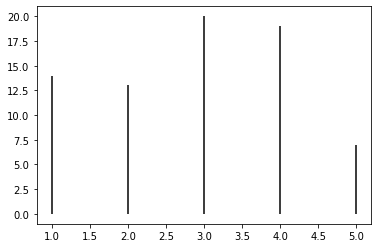

In [6]:
plt.vlines(x = X, ymin = 0, ymax = y)

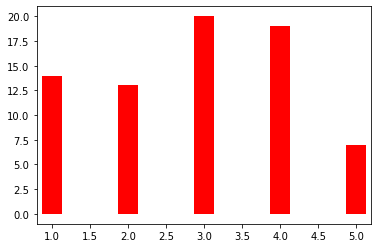

In [7]:
#让线条变宽，就成了柱子
plt.vlines(x = X
          ,ymin = 0 #0循环至与列表y相同长度
          ,ymax = y #y中的每个元素
          ,linewidth = 20 #调节线宽，默认是2
          ,colors = 'red'
          ,linestyles = 'solid' #调节线型，solid/dashed（虚线）/dashdot（点虚线）/（点线）
          )

In [8]:
y

[14, 13, 20, 19, 7]

In [9]:
y.sort()

In [10]:
y

[7, 13, 14, 19, 20]

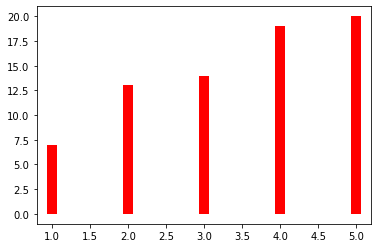

In [12]:
plt.vlines(x = X
          ,ymin = 0 #0循环至与列表y相同长度
          ,ymax = y #y中的每个元素
          ,linewidth = 10 #调节线宽，默认是2
          ,colors = 'red'
          ,linestyles = 'solid' #调节线型，solid/dashed（虚线）/dashdot（点虚线）/（点线）
          )

### 3.1.3 认识数据，准备数据

In [13]:
#导入数据
df_raw = pd.read_csv('http://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')

In [15]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [17]:
df_raw[['cty', 'manufacturer']]

,cty,manufacturer
0,18,audi
1,21,audi
2,20,audi
3,21,audi
4,16,audi
...,...,...
229,19,volkswagen
230,21,volkswagen
231,16,volkswagen
232,18,volkswagen


In [18]:
df_raw[['cty', 'manufacturer']].groupby('manufacturer')

In [19]:
#使用groupby聚合每个品牌的车辆，求每个品牌下的城市里程/加仑的均值
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').mean()
df

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [20]:
#对数据进行排序
df.sort_values('cty', inplace = True)
df.head()

,cty
manufacturer,
lincoln,11.333333
land rover,11.500000
dodge,13.135135
mercury,13.250000
jeep,13.500000


In [21]:
#把索引作为一列特征，reset_index将dataframe的索引恢复到原有的0-n，将原来的索引变成普通的特征
df.reset_index(inplace = True)
df

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000
5,ford,14.000000
6,chevrolet,15.000000
7,pontiac,17.000000
8,audi,17.611111
9,nissan,18.076923


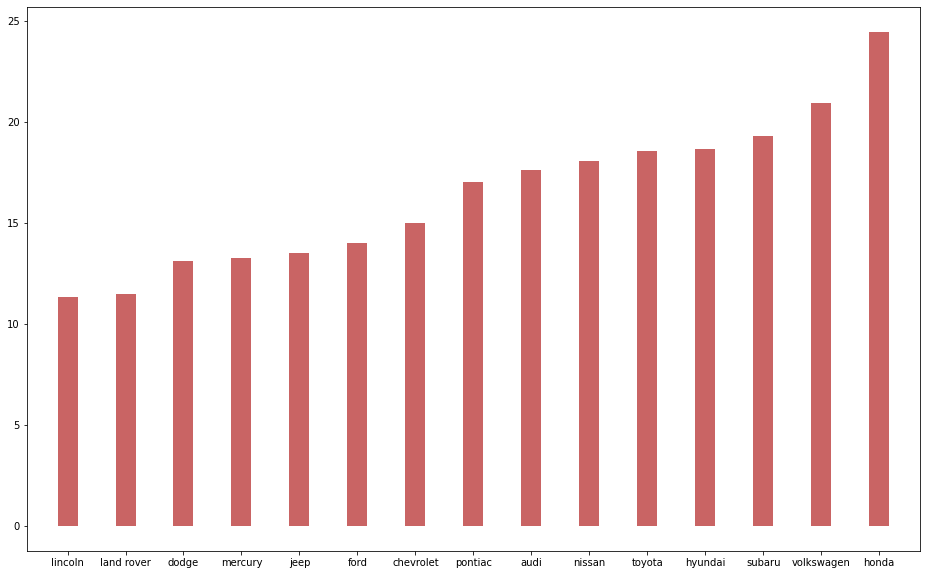

In [24]:
#绘图
plt.figure(figsize = (16,10))
plt.vlines(x = df.manufacturer
          ,ymin = 0
          ,ymax = df.cty
          ,color = 'firebrick' #砖红色
          ,alpha = 0.7 #颜色透明度
          ,linewidth = 20 #线宽20
          )

### 3.1.4 构建画布和子图

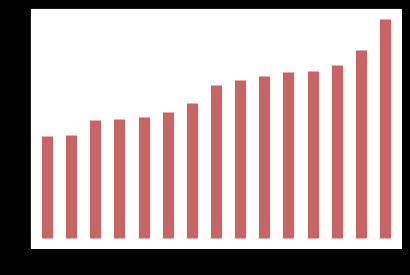

In [26]:
#构建子图和画布
fig, ax = plt.subplots(figsize = (6,4) #图像尺寸
                      #,facecolor = 'white' #画布的填充色，不是子图的颜色
                      ,facecolor = 'black'
                      ,dpi = 80 #分辨率
                      )
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 10
         )

plt.figure：无法调用子图；<br>
plt.subplots：面向对象，生成画布对象、子图对象、坐标轴对象和坐标轴标题标尺等对象。

### 3.1.5 为条形图加注解

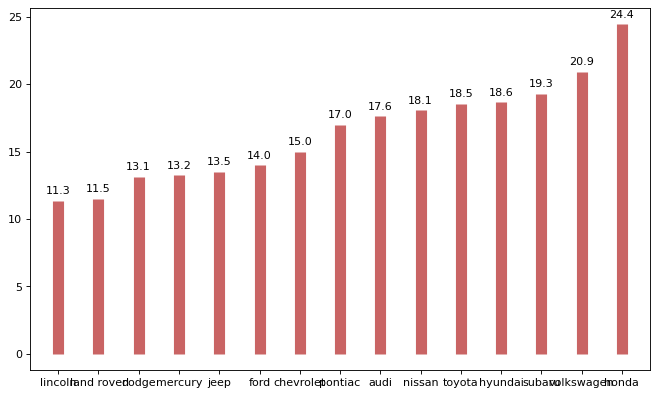

In [27]:
fig, ax = plt.subplots(figsize=(10,6)
                      ,facecolor = 'white'
                      ,dpi = 80
                      )
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 10
         )

#添加文字
for i, cty in enumerate(df.cty):
    ax.text(i #注释横坐标
           ,cty+0.5 #注释纵坐标
           ,round(cty, 1) #保留一位小数
           ,horizontalalignment = 'center' #相对于横纵坐标，文字显示在哪里
           )

### 3.1.6 装饰图像

([<matplotlib.axis.XTick at 0x14e7dca86a0>,
 [Text(0, 0, 'LINCOLN'),
  Text(0, 0, 'LAND ROVER'),
  Text(0, 0, 'DODGE'),
  Text(0, 0, 'MERCURY'),
  Text(0, 0, 'JEEP'),
  Text(0, 0, 'FORD'),
  Text(0, 0, 'CHEVROLET'),
  Text(0, 0, 'PONTIAC'),
  Text(0, 0, 'AUDI'),
  Text(0, 0, 'NISSAN'),
  Text(0, 0, 'TOYOTA'),
  Text(0, 0, 'HYUNDAI'),
  Text(0, 0, 'SUBARU'),
  Text(0, 0, 'VOLKSWAGEN'),
  Text(0, 0, 'HONDA')])

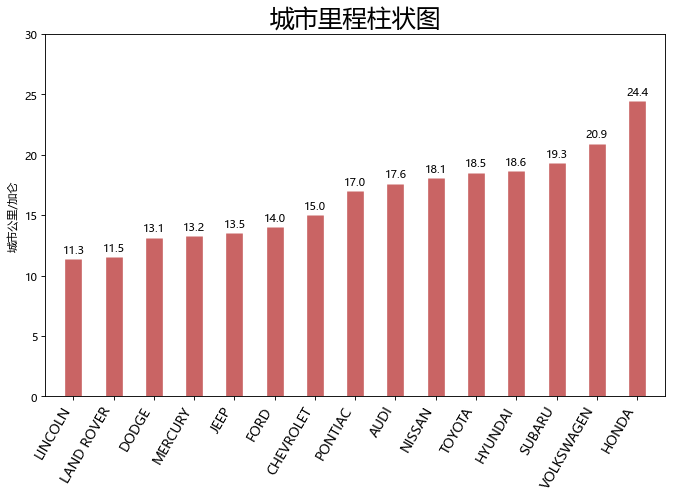

In [30]:
fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi = 80)
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 15
         )

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
for i, cty in enumerate(df.cty):
    ax.text(i
           ,cty+0.5
           ,round(cty, 1)
           ,horizontalalignment = 'center'
           )
ax.set_title('城市里程柱状图', fontdict = {'size':22}) #标题及其字体
ax.set(ylabel = '城市公里/加仑', ylim = (0, 30)) #y轴名称和范围

plt.xticks(df.manufacturer #显示在横坐标上的位置
          ,df.manufacturer.str.upper() #表示内容（大写）
          ,rotation = 60 #旋转60度
          ,horizontalalignment = 'right' #文字偏左侧
          ,fontsize = 12 #标尺字体大小
          )

### 3.1.7 其他面向对象进行的操作

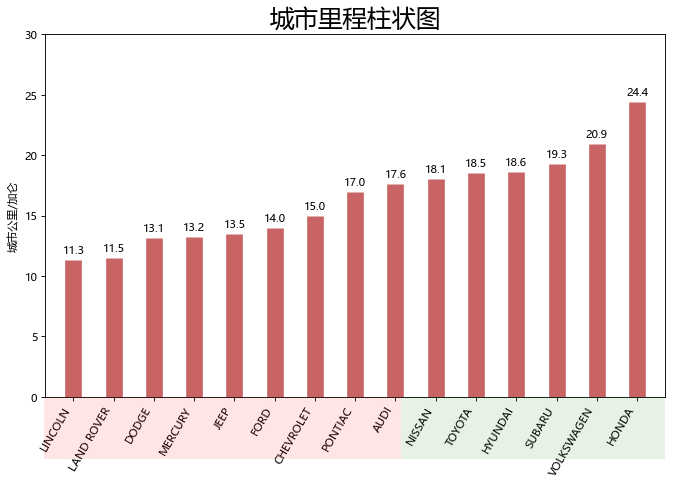

In [33]:
fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi = 80)
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 15
         )

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
for i, cty in enumerate(df.cty):
    ax.text(i
           ,cty+0.5
           ,round(cty, 1)
           ,horizontalalignment = 'center'
           )
ax.set_title('城市里程柱状图', fontdict = {'size':22}) #标题及其字体
ax.set(ylabel = '城市公里/加仑', ylim = (0, 30)) #y轴名称和范围

plt.xticks(df.manufacturer #显示在横坐标上的位置
          ,df.manufacturer.str.upper() #表示内容（大写）
          ,rotation = 60 #旋转60度
          ,horizontalalignment = 'right' #文字偏左侧
          ,fontsize = 10 #标尺字体大小
          )

#构建长方形
p1 = patches.Rectangle((0.57,-0.005) #长方形所在的左下角的坐标x,y
                      ,width = 0.33 #长方形的宽（与x轴平行的那一段）
                      ,height = 0.13 #长方形的高（与y轴平行的那一段）
                      ,alpha = 0.1 #透明度
                      ,facecolor = 'green'
                      ,transform = fig.transFigure #确保矩形显示在图像最上方，如果对fig作画，不会被ax挡住
                      )

p2 = patches.Rectangle((0.124,-0.005) #长方形所在的左下角的坐标x,y
                      ,width = 0.446 #长方形的宽（与x轴平行的那一段）
                      ,height = 0.13 #长方形的高（与y轴平行的那一段）
                      ,alpha = 0.1 #透明度
                      ,facecolor = 'red'
                      ,transform = fig.transFigure #确保矩形显示在图像最上方，如果对fig作画，不会被ax挡住
                      )
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

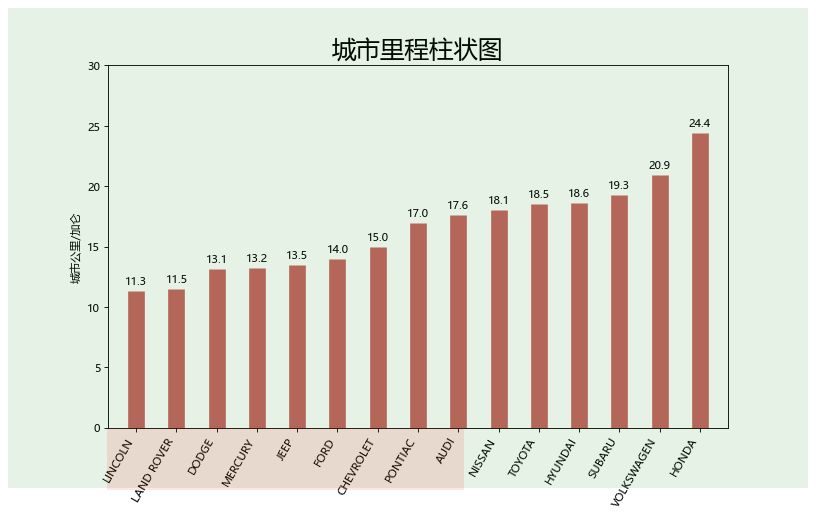

In [52]:
fig, ax = plt.subplots(figsize = (10,6)
                      ,facecolor = 'white'
                      #,facecolor = 'lightblue'
                      ,dpi = 80
                      )
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 15
         )

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
for i, cty in enumerate(df.cty):
    ax.text(i
           ,cty+0.5
           ,round(cty, 1)
           ,horizontalalignment = 'center'
           )
ax.set_title('城市里程柱状图', fontdict = {'size':22}) #标题及其字体
ax.set(ylabel = '城市公里/加仑', ylim = (0, 30)) #y轴名称和范围

plt.xticks(df.manufacturer #显示在横坐标上的位置
          ,df.manufacturer.str.upper() #表示内容（大写）
          ,rotation = 60 #旋转60度
          ,horizontalalignment = 'right' #文字偏左侧
          ,fontsize = 10 #标尺字体大小
          )

#构建长方形，不断试错
p1 = patches.Rectangle((0,0) #长方形所在的左下角的坐标x,y（参照画布大小，画布左下角是(0,0)，画布的宽和高都是1）
                      ,width = 1 #长方形的宽（与x轴平行的那一段）
                      ,height = 1 #长方形的高（与y轴平行的那一段）
                      ,alpha = 0.1 #透明度
                      ,facecolor = 'green'
                      ,transform = fig.transFigure #确保矩形显示在图像最上方，如果对fig作画，不会被ax挡住
                      )

p2 = patches.Rectangle((0.124,-0.005) #长方形所在的左下角的坐标x,y
                      ,width = 0.446 #长方形的宽（与x轴平行的那一段）
                      ,height = 0.13 #长方形的高（与y轴平行的那一段）
                      ,alpha = 0.1 #透明度
                      ,facecolor = 'red'
                      ,transform = fig.transFigure #确保矩形显示在图像最上方，如果对fig作画，不会被ax挡住
                      )
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

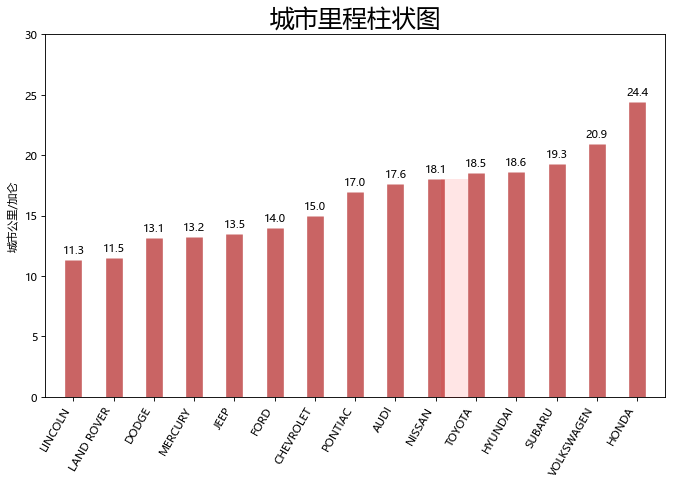

In [51]:
#练习

fig, ax = plt.subplots(figsize = (10,6)
                      ,facecolor = 'white'
                      #,facecolor = 'lightblue'
                      ,dpi = 80
                      )
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 15
         )

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
for i, cty in enumerate(df.cty):
    ax.text(i
           ,cty+0.5
           ,round(cty, 1)
           ,horizontalalignment = 'center'
           )
ax.set_title('城市里程柱状图', fontdict = {'size':22}) #标题及其字体
ax.set(ylabel = '城市公里/加仑', ylim = (0, 30)) #y轴名称和范围

plt.xticks(df.manufacturer #显示在横坐标上的位置
          ,df.manufacturer.str.upper() #表示内容（大写）
          ,rotation = 60 #旋转60度
          ,horizontalalignment = 'right' #文字偏左侧
          ,fontsize = 10 #标尺字体大小
          )

#构建长方形，不断试错
p1 = patches.Rectangle((0.62,0.122) #长方形所在的左下角的坐标x,y（参照画布大小，画布左下角是(0,0)，画布的宽和高都是1）
                      ,width = 0.033 #长方形的宽（与x轴平行的那一段）
                      ,height = 0.456 #长方形的高（与y轴平行的那一段）
                      ,alpha = 0.1 #透明度
                      ,facecolor = 'red'
                      ,transform = fig.transFigure #确保矩形显示在图像最上方，如果对fig作画，不会被ax挡住
                      )

fig.add_artist(p1)
plt.show()

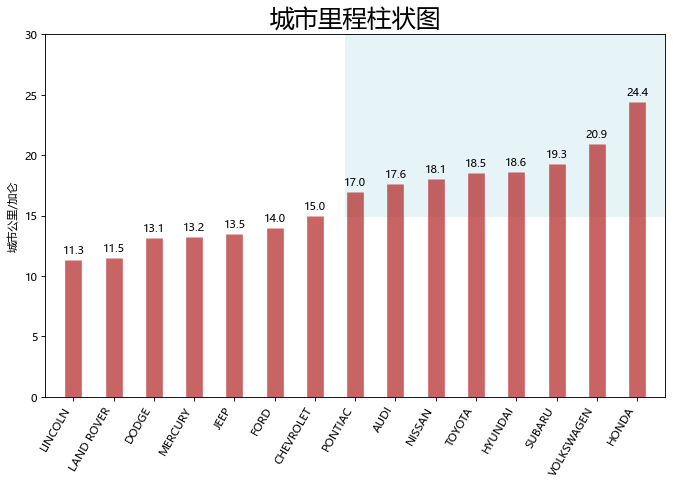

In [57]:
#尝试使用ax.add_patch()和fig.add_patch()
fig, ax = plt.subplots(figsize = (10,6)
                      ,facecolor = 'white'
                      #,facecolor = 'lightblue'
                      ,dpi = 80
                      )
ax.vlines(x = df.manufacturer
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 15
         )

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
for i, cty in enumerate(df.cty):
    ax.text(i
           ,cty+0.5
           ,round(cty, 1)
           ,horizontalalignment = 'center'
           )
ax.set_title('城市里程柱状图', fontdict = {'size':22}) #标题及其字体
ax.set(ylabel = '城市公里/加仑', ylim = (0, 30)) #y轴名称和范围

plt.xticks(df.manufacturer #显示在横坐标上的位置
          ,df.manufacturer.str.upper() #表示内容（大写）
          ,rotation = 60 #旋转60度
          ,horizontalalignment = 'right' #文字偏左侧
          ,fontsize = 10 #标尺字体大小
          )

#构建长方形，不断试错
p0 = patches.Rectangle((0.5, 0.5)
                      ,width = 0.5
                      ,height = 0.5
                      ,alpha = 0.3
                      ,facecolor = 'lightblue'
                      ,transform = fig.transFigure
                      )
#ax.add_patch(p0) #能够添加，但只对子图ax有效
#fig.add_patch(p0) #报错
#fig.add_artist(p0) #能够添加，对整个图像都有效
ax.add_artist(p0) #能够添加，但只对子图ax有效

plt.show()

图像解读：对不同车辆品牌的耗油情况的排序，本田等家用型车辆最节油，林肯等高端车辆最耗油。